In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r'Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.drop(columns=['Id'], inplace=True)

In [4]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import StandardScaler
features = data[['PetalLengthCm', 'PetalWidthCm']]
scaler = StandardScaler()
scaledfeatures = scaler.fit_transform(features)
scaledfeatures[1:5]

array([[-1.3412724 , -1.31297673],
       [-1.39813811, -1.31297673],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673]])

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
target = data[['Species']]
encodedY = encoder.fit_transform(target.values.ravel())
encodedY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    scaledfeatures, encodedY,test_size=0.25, random_state=42
)

In [8]:
xtrain.shape, ytrain.shape

((112, 2), (112,))

In [9]:
from sklearn.svm import SVC

model = SVC()
model.fit(xtrain, ytrain.ravel())

SVC()

In [10]:
ypred = model.predict(xtest)
ypred == ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


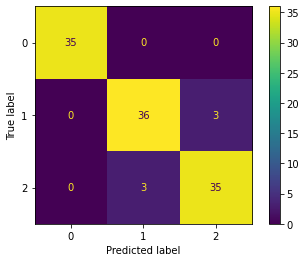

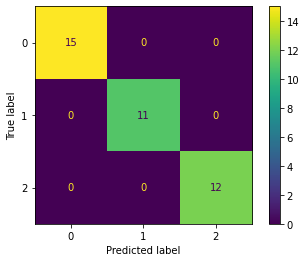

In [11]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score
plot_confusion_matrix(model, xtrain, ytrain)
plot_confusion_matrix(model, xtest, ytest)

In [12]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model, scaledfeatures, encodedY)
cv.mean()

0.96

In [13]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(
    model,
    param_distributions={
        'kernel': ['rbf', 'linear', 'poly'],
        'C': list(range(5, 20, 3)),
        'degree': [3, 5, 6, 7, 8],
    }, scoring='accuracy'
)
grid.fit(scaledfeatures, encodedY)


RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [5, 8, 11, 14, 17],
                                        'degree': [3, 5, 6, 7, 8],
                                        'kernel': ['rbf', 'linear', 'poly']},
                   scoring='accuracy')

In [14]:
grid.best_estimator_, grid.best_params_

(SVC(C=11, degree=6, kernel='linear'),
 {'kernel': 'linear', 'degree': 6, 'C': 11})

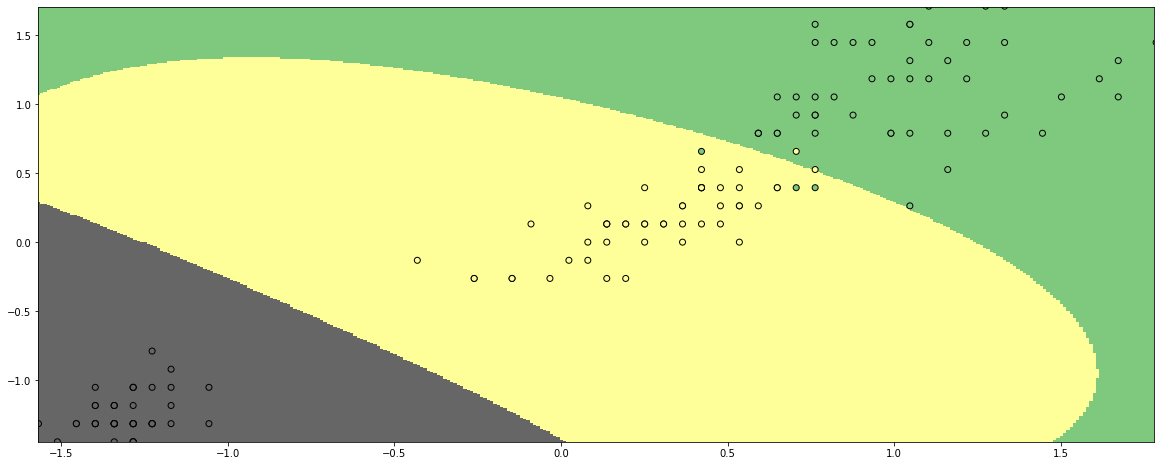

In [15]:
bmodel = SVC(kernel='linear', C=5)
bmodel.fit(scaledfeatures, encodedY.ravel())
# Visualization

xmin, xmax = scaledfeatures[:, 0].min(), scaledfeatures[:, 0].max()
ymin, ymax = scaledfeatures[:, 1].min(), scaledfeatures[:, 1].max()

xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01), np.arange(ymin, ymax, 0.01))
xx.shape, yy.shape

xtest = np.c_[xx.ravel(), yy.ravel()]
xtest.shape
ypred = model.predict(xtest)
ypred = ypred.reshape(yy.shape)
ypred

plt.figure(1, figsize=(20,8))
plt.set_cmap(plt.cm.Accent_r)
plt.pcolormesh(xx, yy, ypred, shading='auto')

plt.scatter(scaledfeatures[:, 0], scaledfeatures[:, 1], c=encodedY, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()